In [143]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
from shapely import wkt
from shapely.affinity import translate
import matplotlib.pyplot as plt
import numpy as np

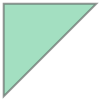

In [148]:
polygonA  = Polygon([[0, 0], [2, 2], [0, 2]])
polygonA

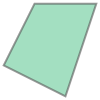

In [193]:
polygonB = Polygon([[3, 1], [4, 4], [2, 4], [1, 2], [3,1]])
polygonB

In [189]:
polygonA = translate(polygonA, 3)

In [190]:
c = np.asarray(polygonA.exterior.coords)
c[2]

array([3., 2.])

In [191]:
c2 = np.asarray(polygonB.exterior.coords)
c2

array([[3., 1.],
       [4., 4.],
       [2., 4.],
       [1., 2.],
       [2., 2.],
       [3., 1.]])

In [195]:
def calculate_nfp(_polygonA, _polygonB):
    proposed_polygones = []
    
    coordsA = np.asarray(_polygonA.exterior.coords)
    selected_vertex = coordsA[1]

    coordsB = np.asarray(_polygonB.exterior.coords)
    for coord in coordsB:
        translate_vector = coord - selected_vertex
        target_polygon = translate(_polygonA, xoff=translate_vector[0], yoff=translate_vector[1])
        proposed_polygones.append(target_polygon)
    return proposed_polygones

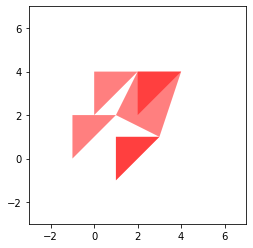

In [196]:
a = calculate_nfp(polygonA, polygonB)
a.append(polygonB)
plot(a)

In [186]:
def plot(_polygons):
    fig, axs = plt.subplots()
    plt.xlim(-3, 7)
    plt.ylim(-3, 7)
    axs.set_aspect("equal")
    
    for polygon in _polygons:
        xs, ys = polygon.exterior.xy
        axs.fill(xs, ys, alpha=0.5, fc="r", ec="none")
        
    plt.show()

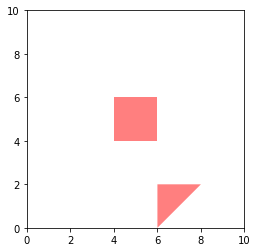

In [147]:
plot([polygonA, polygonB])